## **Name: Yusuf Elnady**

 # Some Needed Imports 

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import random
import math
%matplotlib inline
from math import sqrt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Q1.b (Logistic Regression with Ada Boosting)

In [148]:
X_train = []
y_train = []
for i in range(10):
    x = (pd.read_csv('knn-dataset/trainData'+str(i+1)+'.csv', header=None).to_numpy())
    y = (pd.read_csv('knn-dataset/trainLabels'+str(i+1)+'.csv',header=None).to_numpy())
    X_train.extend(x)
    y_train.extend(y)
y_train = np.array(y_train).flatten()    
X_test = pd.read_csv('knn-dataset/testData.csv',header=None).to_numpy()
y_test=  pd.read_csv('knn-dataset/testLabels.csv',header=None).to_numpy()
y_test = np.array(y_test).flatten() 

In [164]:
n_estimators  = [10,25,50,1000]
learning_reates= [0.0001, 0.001, 0.01]

for n_estimator in n_estimators:
    for rate in learning_reates:
        abc = AdaBoostClassifier(n_estimators=n_estimator, base_estimator=LogisticRegression(),learning_rate=rate)
        model = abc.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        accuracy = metrics.accuracy_score(y_train, y_pred)
        print("The accuracy using",n_estimator,"base learners with learning rate",rate,"is",accuracy*100,"%")

The accuracy using 10 base learners with learning rate 0.0001 is 89.5 %
The accuracy using 10 base learners with learning rate 0.001 is 89.5 %
The accuracy using 10 base learners with learning rate 0.01 is 89.5 %
The accuracy using 25 base learners with learning rate 0.0001 is 89.5 %
The accuracy using 25 base learners with learning rate 0.001 is 89.5 %
The accuracy using 25 base learners with learning rate 0.01 is 89.3 %
The accuracy using 50 base learners with learning rate 0.0001 is 89.5 %
The accuracy using 50 base learners with learning rate 0.001 is 89.5 %
The accuracy using 50 base learners with learning rate 0.01 is 88.9 %
The accuracy using 1000 base learners with learning rate 0.0001 is 89.5 %
The accuracy using 1000 base learners with learning rate 0.001 is 88.7 %
The accuracy using 1000 base learners with learning rate 0.01 is 85.0 %


# Q2.b (KNN with Bagging)

In [ ]:
all_data=[]
for i in range(10):
    x = (pd.read_csv('knn-dataset/trainData'+str(i+1)+'.csv', header=None).to_numpy())
    y = (pd.read_csv('knn-dataset/trainLabels'+str(i+1)+'.csv',header=None).to_numpy())
    # I will combine the rows of data and the output (labels) to be in one array (train):
    all_data.extend(np.append(x,y,axis=1))
    
len(all_data)

In [85]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def get_neighbors(train, test_row, k):
	distances =[]
	for row in train:
		dist = euclidean_distance(test_row[:-1], row[:-1]) 
		distances.append((row, dist)) #distances is consisted of each row and the dist
	distances.sort(key=lambda second: second[1]) #sort by the second element in the list, which is the dist --> we keep the row because this is the one to be returned
	neighbors = []
	for i in range(k): #now distances is sorted, so we will get the class of the top (K) to be my neighbors
		neighbors.append(distances[i][0]) #get the (row) which is distances[i][0] of the k smallest distances
	return neighbors

# Input -> One Test Row, all_other_rows, k (a number of neighbors)
# returns a single predicted class learned from my neighbors in all_rows
def predict_one_row_knn(all_rows, test_row, k):
	neighbors = get_neighbors(all_rows, test_row, k) #neighbors list contains (k) neighbors of test_row, and we want to know the best one

  #Count how many of these class is said to be his neighbor
	output_values = [row[-1] for row in neighbors] #get the last index, that I excluded before while calculating the euclidean distance
	prediction = max(set(output_values), key=output_values.count ) #convert the set to be unique, get the most frequent item in this set to be my class
	return prediction

# Input -> Trains (all training rows that will be used), test_rows (all rows we want their class), k (a number of neighbors)
# Return -> the predictions of this (test)
def KNN(trains, test_rows, k):
    predictions = [] #the predictions of this test
    for row in test_rows:
        class_of_one_row = predict_one_row_knn(trains, row, k)
        class_of_one_row = -1 if class_of_one_row == 5 else +1
        predictions.append(class_of_one_row)
    return(predictions) #the list for all predictions/classes for this (test)
 

In [166]:
#Bagging Step

# For the following code, split once the data rancomly into 700 point and the others into 300 valication points
# We have 700 row/datapoint in the training set

random.shuffle(all_data)

train_data = all_data[:700]
validation_data = all_data[700:]
actual_y_training = [row[-1] for row in train_data]
actual_y_validation = [row[-1] for row in validation_data]

# we have an outer loop that is number of current base learners we are training, K = 2 to 25

# We have an inner loop to predict the output of each row in the validation set, and keep it in an array
# after we finish all the inner loop we will combine the base models and predict the value of each number in the validation
def bootstrap(data,size):
    rnd_indices = np.random.choice(700, size=700,replace=True) # Get random indices from 0 to 699
    return np.array(train_data)[rnd_indices.astype(int)] # Get the elements of those indices

n_neighbors = 19
base_learners_accuracies=[]
for base_learners in range(2,25+1): # Loop from 2 to 25
    base_learner_accuracy=0
    Cumulative_Predictions = np.zeros(700)
    for i in range(base_learners):
        # 1- Get the bootstrap sample (700 point) from the training set. 
        bootstrap_sample = bootstrap(train_data,700)
        # 2- We will have a list of 300 spaces, each base learner will do its predictions on those 300 points 
        #   All predictions will be added to the same array, and lastly we will determine the class using the sign
        #   If predicted is -1 then the class is 5, if predicted is +1 then class is 6
        
        Predection = KNN(bootstrap_sample,train_data,n_neighbors) #Return in one time the predection of all validation
        Cumulative_Predictions = np.add(Predection,Cumulative_Predictions) #Add Cumulative Predections for all base learners
    accuracy = calc_accuracy(actual_y_training,Cumulative_Predictions) 
    print("Accuracy using",base_learners, " base learners is", accuracy*100,"%")
    base_learners_accuracies.append(accuracy)


Accuracy using 2  base learners is 77.42857142857143 %
Accuracy using 3  base learners is 82.14285714285714 %
Accuracy using 4  base learners is 82.71428571428572 %
Accuracy using 5  base learners is 80.85714285714286 %
Accuracy using 6  base learners is 83.14285714285714 %
Accuracy using 7  base learners is 83.71428571428572 %
Accuracy using 8  base learners is 81.0 %
Accuracy using 9  base learners is 83.85714285714285 %
Accuracy using 10  base learners is 83.0 %
Accuracy using 11  base learners is 86.0 %
Accuracy using 12  base learners is 82.85714285714286 %
Accuracy using 13  base learners is 83.42857142857143 %
Accuracy using 14  base learners is 83.14285714285714 %
Accuracy using 15  base learners is 83.57142857142857 %
Accuracy using 16  base learners is 83.71428571428572 %
Accuracy using 17  base learners is 83.14285714285714 %
Accuracy using 18  base learners is 81.57142857142857 %
Accuracy using 19  base learners is 83.14285714285714 %
Accuracy using 20  base learners is 84.

In [79]:
# Input -> actuals (we got them from last index in validation data), predictions (are cumulative predections/signs)
def calc_accuracy(actuals,predections):
    accuracy =  0
    for actual,predection in zip(actuals,predections):
        predicted = 5 if predection<0 else 6
        if (actual==predicted) : 
            accuracy+=1
    return accuracy/len(predections)


The best training accuracy I got on the validation dataset is 86.0 % with 11 base learners


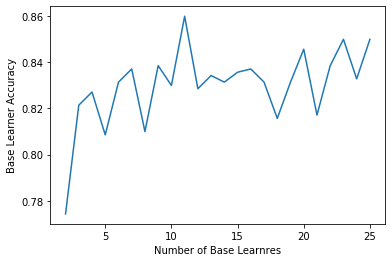

In [168]:
max_accuracy = max(base_learners_accuracies) #Get the highest accuracy 
max_idx = base_learners_accuracies.index(max(base_learners_accuracies)) #Get the index of the highest accuracy
best_n_base_learners = range(0,25).index(max_idx+2) #Get the best number of learners
plt.xlabel("Number of Base Learnres")
plt.ylabel("Base Learner Accuracy")
plt.plot(np.arange(2,25+1),base_learners_accuracies)
print("The best training accuracy I got on the validation dataset is",max_accuracy*100,"% with",
      best_n_base_learners,"base learners")

**The best training accuracy I got on the validation dataset is 86.0 % with 11 base learners**


Q2.b.iii


The highest accuracy I got before in Assignment 1 when I was using KNN without any bagging was 82.5%, but here we were able to increase the accuracy to 86% which is a large increase in the performance. However, bagging is rarely used in conjunction with KNN classifiers, as the decision surfaces are typically too stable and any multiples of datapoints in the bootstrap sample do not shift the 'weight' like in many other models. Moreover, if we just used 1-NN, then it doesn't have any effect and perfectly equivalent to the bagged 1-NN. But ensemble subsets of KNN outperform the KNN based methods. 

The reason for that is that we are not stuck to using one model and based on the nearest neighbors for it we decide which are the correct class for it. In bagging we do bootstrap sampling with replacement, which means that not all samples will not be existing in each base learner so we are expected to see some points are classified from the previous iteration. But again we use the majority vote to decide on classifying each point, so herein we improve the accuracy of our model. . A test datapoint can change classification only if its nearest neighbors in the learning set is not in at least half of the N bootstrap samples. The probability for this to occur is the same as the probability of flipping a weighted coin with a 0.632 probability for heads N times and getting less than 0.5N heads. As N gets larger this probability gets smaller and smaller. The Similar logic holds for multiclass problems and KNN.